In [18]:
import pandas as pd
query_1 = pd.read_csv('query_1.csv')
query_3 = pd.read_csv('query_3.csv')

In [19]:
print(query_1)

                 model  flights_amount
0      Airbus A319-100             607
1      Airbus A321-200             960
2       Boeing 737-300             630
3       Boeing 767-300             600
4       Boeing 777-300             300
5   Bombardier CRJ-200            4446
6   Cessna 208 Caravan            4557
7  Sukhoi SuperJet-100            4185


In [20]:
print(query_3)

               city  average_flights
0            Абакан         3.870968
1           Анадырь         1.000000
2             Анапа         2.161290
3       Архангельск         5.354839
4         Астрахань         2.451613
5           Барнаул         2.612903
6          Белгород         6.000000
7        Белоярский         2.000000
8      Благовещенск         1.000000
9            Братск         1.000000
10           Брянск        10.000000
11         Бугульма         3.000000
12      Владивосток         3.000000
13      Владикавказ         2.000000
14        Волгоград         5.129032
15          Воркута         4.580645
16          Воронеж         2.000000
17        Геленджик         2.590909
18    Горно-Алтайск         1.387097
19          Грозный         1.129032
20     Екатеринбург        11.322581
21          Иваново         1.000000
22           Ижевск         1.000000
23          Иркутск         6.032258
24       Йошкар-Ола         4.290323
25           Казань         7.741935
2

In [21]:
query_3['average_flights'] = round(query_3['average_flights'], 2)
query_1 = query_1.sort_values(by = 'flights_amount', ascending = False)
print(query_3)

               city  average_flights
0            Абакан             3.87
1           Анадырь             1.00
2             Анапа             2.16
3       Архангельск             5.35
4         Астрахань             2.45
5           Барнаул             2.61
6          Белгород             6.00
7        Белоярский             2.00
8      Благовещенск             1.00
9            Братск             1.00
10           Брянск            10.00
11         Бугульма             3.00
12      Владивосток             3.00
13      Владикавказ             2.00
14        Волгоград             5.13
15          Воркута             4.58
16          Воронеж             2.00
17        Геленджик             2.59
18    Горно-Алтайск             1.39
19          Грозный             1.13
20     Екатеринбург            11.32
21          Иваново             1.00
22           Ижевск             1.00
23          Иркутск             6.03
24       Йошкар-Ола             4.29
25           Казань             7.74
2

In [22]:
query_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 6 to 4
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 192.0+ bytes


In [23]:
query_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [24]:
print('Топ 10 городов по колличеству рейсов:')
query_3 = query_3.sort_values(by = 'average_flights', ascending = False)
print(query_3.head(10))

Топ 10 городов по колличеству рейсов:
               city  average_flights
43           Москва           129.77
70  Санкт-Петербург            31.16
54      Новосибирск            17.32
33       Красноярск            11.58
20     Екатеринбург            11.32
67   Ростов-на-Дону            10.19
63            Пермь            10.13
10           Брянск            10.00
74             Сочи             9.61
84        Ульяновск             9.58


Модели самолетов и количество рейсов


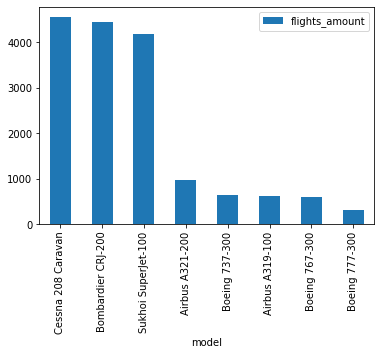

In [25]:
print('Модели самолетов и количество рейсов')
query_1.plot(y = 'flights_amount', 
             x = 'model', 
             kind ='bar')

Города и количество рейсов


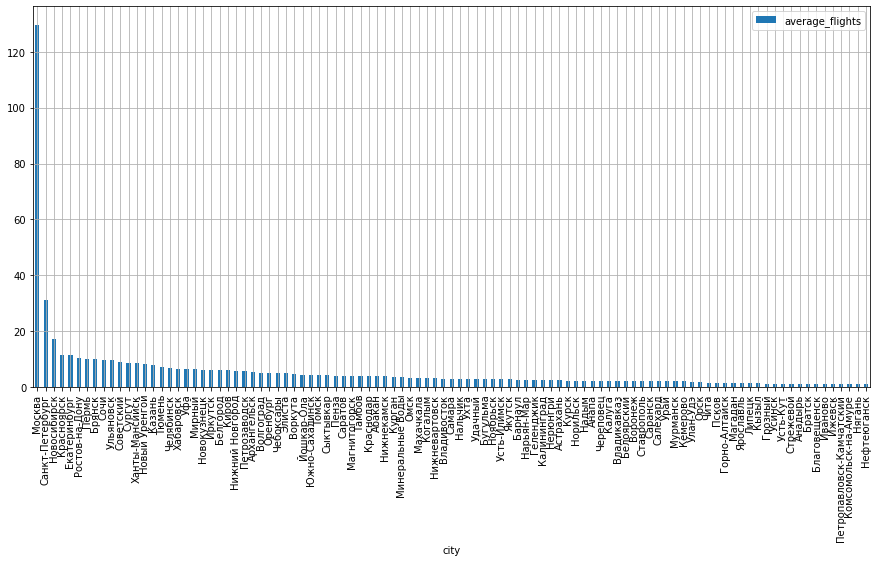

In [26]:
print('Города и количество рейсов')
query_3.plot(
    y = 'average_flights',
    kind = 'bar',
    x = 'city', 
    figsize = (15, 7),
    grid = True)

Tоп-10 городов и количество рейсов


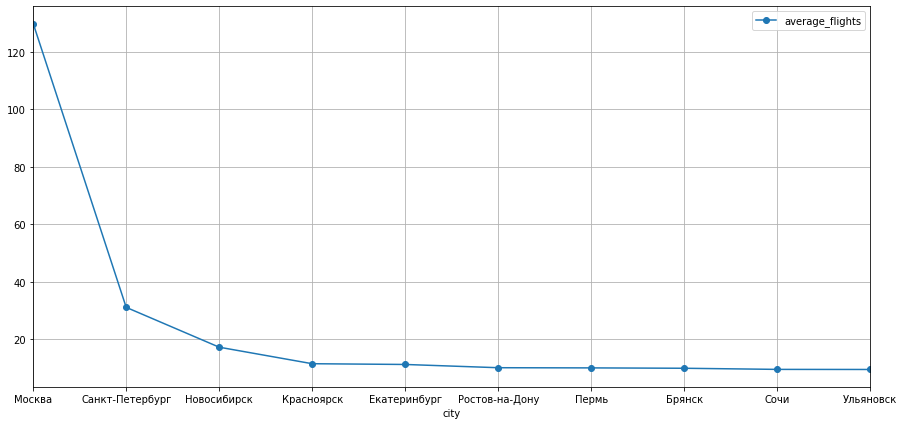

In [27]:
print('Tоп-10 городов и количество рейсов')
query_3.head(10).plot(x = 'city', 
                style = 'o-',
                figsize = (15, 7),
                grid = True)

Большим спросом пользуются модели самолетов: Bombardier CRJ-200, Cessna 208 Caravan, Sukhoi SuperJet-100 - более 4000 рейсов
Колличество рейсов в массе равномерно растянулось между 11 и 1
Значительно больше чем в других городах рейсов в Москве - 129, Санкт-Петербурге - 31, Новосибирске - 17

Проверим гипотизу:
-Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время

Нулевая гипотеза заключается в том что не отличаются, ненуливая - отличаются
Для проверки будем использовать нашу выборку с 23 июля по 30 сентября 2018 года по фестивалям и колличествам билетов понедельно

In [28]:
query_last = pd.read_csv('query_last.csv')
print(query_last)

   week_number  ticket_amount  festival_week festival_name
0           30          43568           30.0     Park Live
1           31          51034           31.0  Пикник Афиши
2           32          51675            NaN           NaN
3           33          51378            NaN           NaN
4           34          51492            NaN           NaN
5           35          51360            NaN           NaN
6           36          51386           36.0       Видфест
7           37          51670            NaN           NaN
8           38          51518            NaN           NaN
9           39          51623            NaN           NaN


In [29]:
print('Разделим таблицу на 2: с фестивалями и без')
query_last_is_fest = query_last[query_last['festival_week'].notnull()]
query_last_no_fest = query_last[query_last['festival_week'].isnull()]

Разделим таблицу на 2: с фестивалями и без


In [30]:
print('Таблица с фестивалями')
print(query_last_is_fest)

Таблица с фестивалями
   week_number  ticket_amount  festival_week festival_name
0           30          43568           30.0     Park Live
1           31          51034           31.0  Пикник Афиши
6           36          51386           36.0       Видфест


In [31]:
print('Таблица без фестивалей')
print(query_last_no_fest)

Таблица без фестивалей
   week_number  ticket_amount  festival_week festival_name
2           32          51675            NaN           NaN
3           33          51378            NaN           NaN
4           34          51492            NaN           NaN
5           35          51360            NaN           NaN
7           37          51670            NaN           NaN
8           38          51518            NaN           NaN
9           39          51623            NaN           NaN


In [32]:
from scipy import stats as st
print('альфу примем за 0.05')
alpha = 0.05

results = st.ttest_ind(
    query_last_is_fest['ticket_amount'], 
    query_last_no_fest['ticket_amount'],
    equal_var = True)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

альфу примем за 0.05
p-значение: 0.09688869045922928
Не получилось отвергнуть нулевую гипотезу


Вывод: средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время

ОБЩИЙ ВЫВОД!!!

Большим спросом пользуются модели самолетов: Bombardier CRJ-200, Cessna 208 Caravan, Sukhoi SuperJet-100 - более 4000 рейсов
Колличество рейсов в массе равномерно растянулось между 11 и 1
Значительно больше чем в других городах рейсов в Москве - 129, Санкт-Петербурге - 31, Новосибирске - 17

Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время